In [1]:
# importing necessary libraries
import pyximport
import numpy as np
import os

from   dengo.chemistry_constants import tiny, kboltz, mh, G
import dengo.primordial_rates
import dengo.primordial_cooling

from dengo.chemical_network import \
    ChemicalNetwork, \
    reaction_registry, \
    cooling_registry, \
    species_registry
import dengo.primordial_rates
import dengo.primordial_cooling

import sympy
from sympy import lambdify
import matplotlib.pyplot as plt

In [2]:
def setup_primordial_network():
    """Initial a ChemicalNetwork object
    for primordial network 9-species model
    Return:
     primordial: ChemicalNetwork with primordial reactions and cooling
    """
    # this register all the rates specified in `primordial_rates.py`
    dengo.primordial_rates.setup_primordial()

    # initialize the chmical network object
    primordial = ChemicalNetwork()

    # add all the reactions
    primordial.add_reaction("k01")
    primordial.add_reaction("k02")
    primordial.add_reaction("k03")
    primordial.add_reaction("k04")
    primordial.add_reaction("k05")
    primordial.add_reaction("k06")
    primordial.add_reaction("k07")
    primordial.add_reaction("k08")
    primordial.add_reaction("k09")
    primordial.add_reaction("k10")
    primordial.add_reaction("k11")
    primordial.add_reaction("k12")
    primordial.add_reaction("k13")
    primordial.add_reaction("k14")
    primordial.add_reaction("k15")
    primordial.add_reaction("k16")
    primordial.add_reaction("k17")
    primordial.add_reaction("k18")
    primordial.add_reaction("k19")
    primordial.add_reaction("k21")
    primordial.add_reaction("k22")
    primordial.add_reaction("k23")

    primordial.add_cooling("brem")
    primordial.add_cooling("reHII")
    primordial.add_cooling("reHeIII")
    primordial.add_cooling("gloverabel08")
    primordial.add_cooling("ceHI")
    primordial.add_cooling("h2formation")
    primordial.add_cooling("reHeII2")
    primordial.add_cooling("reHeII1")
    primordial.add_cooling("ciHeIS")
    primordial.add_cooling("ceHeII")
    primordial.add_cooling("ciHI")
    primordial.add_cooling("ceHeI")
    primordial.add_cooling("gammah")
    primordial.add_cooling("ciHeI")
    primordial.add_cooling("ciHeII")
    primordial.add_cooling("cie_cooling")
    primordial.add_cooling("compton")

    # This defines the temperature range for the rate tables
    primordial.init_temperature((1e0, 1e8))
    
    return primordial
#     primordial.enforce_conservation = True
#     primordial.set_equilibrium_species("H2_2")

cn_simple = setup_primordial_network()

Adding reaction: k01 : 1*H_1 + 1*de => 1*H_2 + 2*de
Adding reaction: k02 : 1*H_2 + 1*de => 1*H_1
Adding reaction: k03 : 1*He_1 + 1*de => 1*He_2 + 2*de
Adding reaction: k04 : 1*He_2 + 1*de => 1*He_1
Adding reaction: k05 : 1*He_2 + 1*de => 1*He_3 + 2*de
Adding reaction: k06 : 1*He_3 + 1*de => 1*He_2
Adding reaction: k07 : 1*H_1 + 1*de => 1*H_m0
Adding reaction: k08 : 1*H_m0 + 1*H_1 => 1*H2_1 + 1*de
Adding reaction: k09 : 1*H_1 + 1*H_2 => 1*H2_2
Adding reaction: k10 : 1*H2_2 + 1*H_1 => 1*H2_1 + 1*H_2
Adding reaction: k11 : 1*H2_1 + 1*H_2 => 1*H2_2 + 1*H_1
Adding reaction: k12 : 1*H2_1 + 1*de => 2*H_1 + 1*de
Adding reaction: k13 : 1*H2_1 + 1*H_1 => 3*H_1
Adding reaction: k14 : 1*H_m0 + 1*de => 1*H_1 + 2*de
Adding reaction: k15 : 1*H_m0 + 1*H_1 => 2*H_1 + 1*de
Adding reaction: k16 : 1*H_m0 + 1*H_2 => 2*H_1
Adding reaction: k17 : 1*H_m0 + 1*H_2 => 1*H2_2 + 1*de
Adding reaction: k18 : 1*H2_2 + 1*de => 2*H_1
Adding reaction: k19 : 1*H2_2 + 1*H_m0 => 1*H_1 + 1*H2_1
Adding reaction: k21 : 2*H_1 

In [3]:
output_dir = "."
solver_name = "simple"
use_omp = True
use_cvode = True
use_suitesparse = True

# specify the library path
os.environ["HDF5_DIR"] = "/home/kwoksun2/anaconda3"
os.environ["CVODE_PATH"] = "/home/kwoksun2/dengo-merge/cvode-3.1.0/instdir"
os.environ["HDF5_PATH"]  = "/home/kwoksun2/anaconda3"
os.environ["SUITESPARSE_PATH"] = "/home/kwoksun2/dengo-merge/suitesparse"
os.environ["DENGO_INSTALL_PATH"] = "/home/kwoksun2/dengo_install"

# write the solver
# cn_simple.write_solver(solver_name, output_dir=output_dir,
#                 solver_template="be_chem_solve/rates_and_rate_tables",
#                 ode_solver_source="BE_chem_solve.C")

In [4]:
# install the library
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True, inplace=True)

(None, <pyximport.pyximport.PyxImporter at 0x7f41669fd8e0>)

In [75]:
# compile a BE chem solve one
solver_nameBE = "simpleBE"
cn_simple.write_solver(solver_nameBE, output_dir=output_dir,
                solver_template="be_chem_solve/rates_and_rate_tables",
                ode_solver_source="BE_chem_solve.C")
simple_solver_run_beChem = pyximport.load_module(
    "{}_solver_run".format(solver_nameBE),
    "{}_solver_run.pyx".format(solver_nameBE),
    build_inplace=True, pyxbuild_dir="_dengo_temp")

/home/kwoksun2/dengo-merge/dengo/primordial_rates.py:110: RuntimeWarning: overflow encountered in exp
  vals = (1.54e-9*(1.+0.3/np.exp(8.099328789667/state.tev))
/home/kwoksun2/dengo-merge/dengo/primordial_rates.py:111: RuntimeWarning: overflow encountered in exp
  / (np.exp(40.49664394833662/state.tev)*state.tev**1.5)
/home/kwoksun2/dengo-merge/dengo/primordial_cooling.py:317: RuntimeWarning: overflow encountered in power
  vals[_i2] = 10.0**(-21.928796 \
/home/kwoksun2/dengo-merge/dengo/primordial_cooling.py:341: RuntimeWarning: overflow encountered in power
  vals = 10.0**(-20.584225
/home/kwoksun2/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/kwoksun2/dengo-merge/cookbook/simpleBE_solver_run.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)


In [8]:
solver_nameCV = "simpleCV"
cn_simple.write_solver(solver_nameCV, output_dir=output_dir,
                solver_template="cv_omp/sundials_CVDls",
                ode_solver_source="initialize_cvode_solver.C")
simple_solver_run_CV = pyximport.load_module(
    "{}_solver_run".format(solver_nameCV),
    "{}_solver_run.pyx".format(solver_nameCV),
    build_inplace=True, pyxbuild_dir="_dengo_temp")

You have suitesparse!


/home/kwoksun2/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/kwoksun2/dengo-merge/cookbook/simpleCV_solver_run.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)


In [9]:
def setup_initial_conditions(network, density, temperature, h2frac, NCELLS):
    # setting initial conditions
    temperature = np.ones((NCELLS))*temperature
    init_array = np.ones(NCELLS) * density
    init_values = dict()
    init_values["H_1"] = init_array * 0.76 * ( 1-h2frac )
    init_values['H_2'] = init_array * tiny
    init_values['H_m0'] = init_array * tiny
    init_values['He_1'] = init_array * 0.24
    init_values['He_2'] = init_array * tiny
    init_values['He_3'] = init_array * tiny
    init_values['H2_1'] = init_array * 0.76 * h2frac
    init_values['H2_2'] = init_array * tiny
    init_values['de'] = init_array * tiny

    # update and calculate electron density and etc with the handy functions
    # init_values = primordial.convert_to_mass_density(init_values)
    init_values['de'] = network.calculate_free_electrons(init_values)
    # init_values['density'] = primordial.calculate_total_density(init_values)
    init_values['density'] = np.ones((NCELLS))*density
    number_density = network.calculate_number_density(init_values)

    # set up initial temperatures values used to define ge
    init_values['T'] = temperature

    # calculate ge (very crudely, no H2 help here)
    gamma = 5.0/3.0
    mH = 1.67e-24
    init_values["ge"] = 3.0 / 2.0 * temperature * kboltz / mH

    return init_values

In [72]:
# Initial Conditions
density = 1e10 # number density
temperature = 1000.0 # K
H2Fraction  = 0.001 # molecular mass fraction
ncells = 1 # number of cells

# freefall timescale
dtf = 10.0/ np.sqrt(G*mh*density)

states =  setup_initial_conditions(cn_simple, density, temperature, H2Fraction, ncells)
rv, rv_intBE = simple_solver_run_beChem.run_simpleBE(states, dtf, niter=1e6, reltol = 1.0e-5, z = 0.0);

Successful iteration[    0]: (2.995e+05) 2.995e+05 / 2.995e+11
Successful iteration[  100]: (4.128e+09) 4.540e+10 / 2.995e+11
End in 121 iterations: 2.99536e+11 / 2.99536e+11 (0.00000e+00)


In [73]:
# Initial Conditions
density = 1e10 # number density
temperature = 1000.0 # K
H2Fraction  = 0.001 # molecular mass fraction
ncells = 1 # number of cells

# freefall timescale
dtf = 10.0/ np.sqrt(G*mh*density)

states =  setup_initial_conditions(cn_simple, density, temperature, H2Fraction, ncells)
rv, rv_intCV = simple_solver_run_CV.run_simpleCV(states, dtf, niter=1e6, reltol = 1.0e-5, z = 0.0)

Successful iteration[    0]: (2.995e+05) 2.995e+05 / 2.995e+11
Successful iteration[  100]: (4.128e+09) 4.540e+10 / 2.995e+11
End in 121 iterations: 2.99536e+11 / 2.99536e+11 (0.00000e+00)


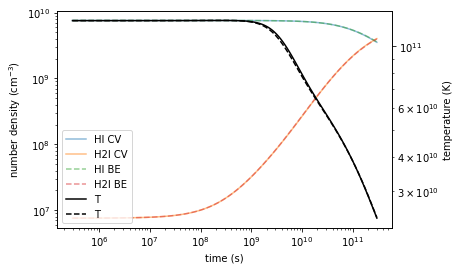

In [74]:
f, ax = plt.subplots(figsize=(6,4))
ax2 = ax.twinx()

def plot_results(ax, ax2, rv_int, label, ls='-'):
    flag = rv_int["successful"]
    t    = rv_int["t"][flag]
    H2I  = rv_int["H2_1"][0][flag]
    HI   = rv_int["H_1"][0][flag]
    T    = rv_int['ge'][0][flag]


    ax.loglog(t, HI, label='HI '+label, alpha=0.5, ls=ls)
    ax.loglog(t, H2I, label="H2I " +label, alpha=0.5, ls =ls)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("number density $(\mathrm{cm^{-3}})$")
    
    ax2.loglog(t, T, label='T', color='k', ls =ls)
    ax2.set_ylabel("temperature (K)")
    return ax, ax2 

ax, ax2 = plot_results(ax, ax2, rv_intCV, label='CV')
ax, ax2 = plot_results(ax, ax2, rv_intBE, label='BE', ls ='--')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

In [34]:
# extract_final_step(rv_intBE), 
extract_final_step(rv_intCV)

{'H2_1': 4026166354.320087,
 'H2_2': 4.839138243608271e-12,
 'H_1': 3541926228.8228884,
 'H_2': 0.0037114745976566436,
 'H_m0': 2.804049434803299e-10,
 'He_1': 2399999999.9975863,
 'He_2': 0.002419146984754997,
 'He_3': 9.973509349093817e-11,
 'de': 0.004286630993085214,
 'ge': 23986740277.19627,
 'T': 261.6418079204859,
 't': 299535749868.7639}

In [33]:
def extract_final_step(result):
    flag = result['successful']
    skip = ['successful', 't', 'dt']
    out = {}
    for k, v in result.items():
        if k in skip: continue
        out[k] = v[0][flag][-1]
    out['t'] = result['t'][flag][-1]
    return out

# extract_final_step(rv_intBE)

In [70]:


def run_grid(solver, density, temperature, h2frac):
    results = []
    for d in density:
        for T in temperature:
            for f in h2frac:
                init_values = setup_initial_conditions(cn_simple, d, T, f, 1)
                dtf = float(1.0/ np.sqrt(G*mh*d))
                rv, rv_int = solver(init_values, dtf, niter=1e4, reltol = 1.0e-5)
                results.append(extract_final_step(rv_int))
    return results

In [142]:
darray = np.logspace(0,10,11)
tarray = np.logspace(2, 3.5,11)
h2frac = [1.0e-6, 1.0e-5, 1.0e-4]
cv_grid = run_grid(simple_solver_run_CV.run_simpleCV, darray, tarray, h2frac)

Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)


In [143]:
darray = np.logspace(0,10,11)
tarray = np.logspace(2, 3.5,11)
h2frac = [1.0e-6, 1.0e-5, 1.0e-4]
be_grid = run_grid(simple_solver_run_beChem.run_simpleBE, darray, tarray, h2frac)

Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)
Successful iteration[    0]: (2.995e+11) 2.995e+11 / 2.995e+15
End in 73 iterations: 2.99536e+15 / 2.99536e+15 (0.00000e+00)


In [148]:
def reshape_grid(grid):
    keys = grid[0].keys()
    
    out = {}
    for k in keys: out[k] = []
    for g in grid:
        for k in keys:
            out[k].append(g[k])
    return {k: np.array(v) for k, v in out.items()}

In [149]:
be_grid_ =reshape_grid(be_grid)
cv_grid_ =reshape_grid(cv_grid)

In [150]:
ratio = {}
for k in cv_grid_.keys():
    ratio[k] = be_grid_[k]/ cv_grid_[k]

H2_1


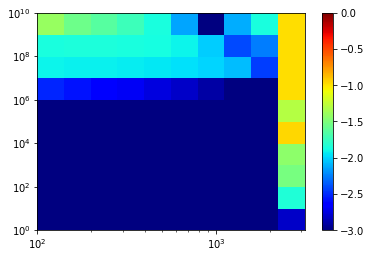

H2_2


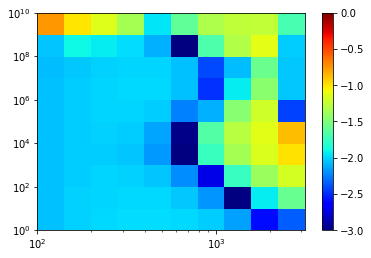

H_1


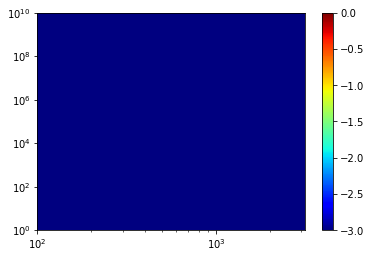

H_2


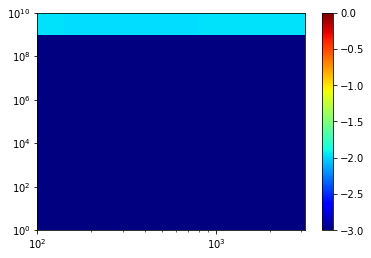

H_m0


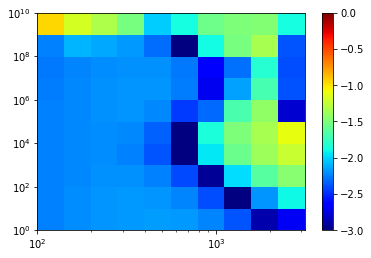

He_1


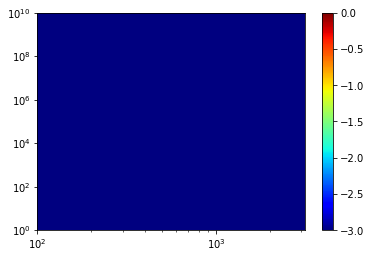

He_2


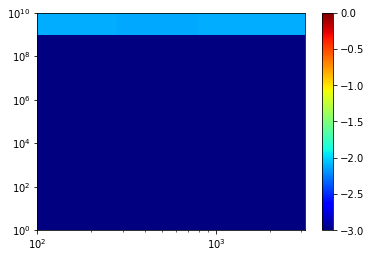

He_3


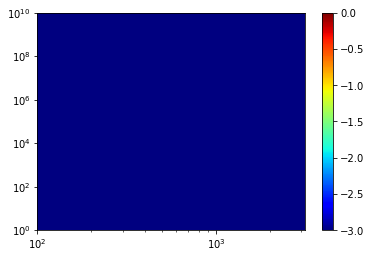

de


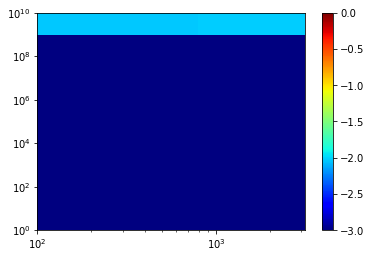

ge


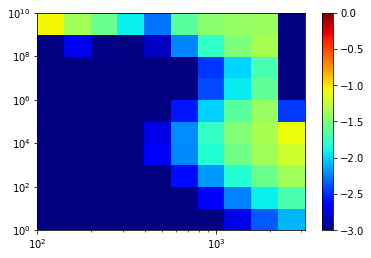

T


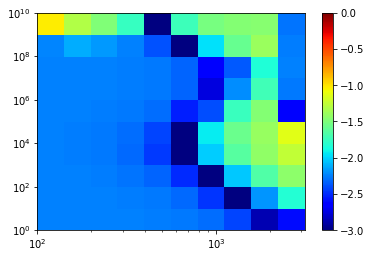

t


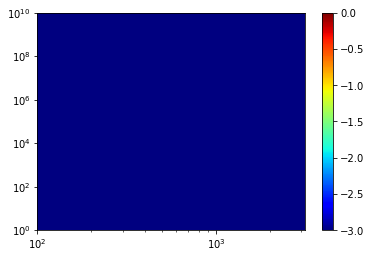

In [152]:
for k in ratio.keys():
    print(k)
    err = np.abs(ratio[k].reshape(11,11,3)[:,:,0] -1 + 1e-12)
    plt.pcolormesh(tarray, darray, np.log10(err), vmin=-3, vmax=0, cmap='jet')
    plt.xscale('log')
    plt.yscale('log')
    plt.colorbar()
    plt.show()

In [160]:
err = np.abs(ratio['T'].reshape(11,11,3)[:,:,1] -1 + 1e-12)

In [161]:
err.max()

0.09361514903256754

In [7]:
import h5py
import matplotlib.pyplot as plt

In [2]:
f= h5py.File("simpleBE_tables.h5", 'r')

In [3]:
f.keys()

<KeysViewHDF5 ['brem_brem', 'ceHI_ceHI', 'ceHeII_ceHeII', 'ceHeI_ceHeI', 'ciHI_ciHI', 'ciHeII_ciHeII', 'ciHeIS_ciHeIS', 'ciHeI_ciHeI', 'cie_cooling_cieco', 'compton_comp_', 'dgammaH2_1_dT', 'dgammaH2_2_dT', 'gammaH2_1', 'gammaH2_2', 'gammah_gammah', 'gloverabel08_gaH2', 'gloverabel08_gaHI', 'gloverabel08_gaHe', 'gloverabel08_gaHp', 'gloverabel08_gael', 'gloverabel08_gphdl', 'gloverabel08_gpldl', 'gloverabel08_h2lte', 'h2formation_h2mcool', 'h2formation_h2mheat', 'h2formation_ncrd1', 'h2formation_ncrd2', 'h2formation_ncrn', 'k01', 'k02', 'k03', 'k04', 'k05', 'k06', 'k07', 'k08', 'k09', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k21', 'k22', 'k23', 'reHII_reHII', 'reHeII1_reHeII1', 'reHeII2_reHeII2', 'reHeIII_reHeIII']>

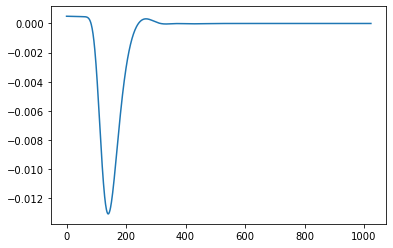

In [9]:
plt.plot(f['dgammaH2_1_dT'][:])